# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue 

In [2]:
import tensorflow as tf 
import os

2023-05-12 00:31:08.858096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 00:31:08.974476: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-12 00:31:08.979386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 00:31:08.979400: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-12 00:31:10.325066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-12 00:31:10.325098: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-12 00:31:10.325115: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import imghdr

In [6]:
data_dir = '/work/Cancer2'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer2/PC/PC01.jpeg
Issue with image /work/Cancer2/PC/PC30.jpeg
Issue with image /work/Cancer2/PC/PC19.jpeg
Issue with image /work/Cancer2/PC/PC28.jpeg
Issue with image /work/Cancer2/PC/PC34.jpeg
Issue with image /work/Cancer2/PC/PC05.jpeg
Issue with image /work/Cancer2/PC/PC27 (1).jpeg
Issue with image /work/Cancer2/PC/PC20.jpeg
Issue with image /work/Cancer2/PC/PC09.jpeg
Issue with image /work/Cancer2/PC/PC38.jpeg
Issue with image /work/Cancer2/PC/PC24.jpeg
Issue with image /work/Cancer2/PC/PC15.jpeg
Issue with image /work/Cancer2/PC/PC21.jpeg
Issue with image /work/Cancer2/PC/PC27 (3).jpeg
Issue with image /work/Cancer2/PC/PC25.jpeg
Issue with image /work/Cancer2/PC/PC14.jpeg
Issue with image /work/Cancer2/PC/PC31.jpeg
Issue with image /work/Cancer2/PC/PC18.jpeg
Issue with image /work/Cancer2/PC/PC29.jpeg
Issue with image /work/Cancer2/PC/PC27 (2).jpeg
Issue with image /work/Cancer2/PC/PC35.jpeg
Issue with image /work/Cancer2/PC/PC04.jpeg
Issue with image /wo

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer2')

Found 88 files belonging to 2 classes.
2023-05-12 00:31:11.418726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

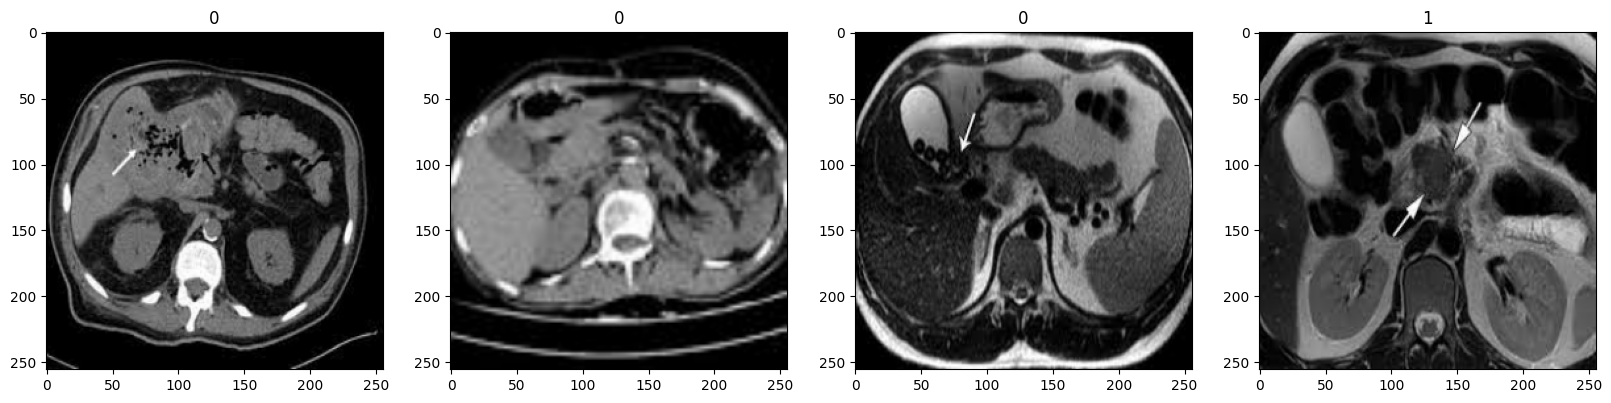

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

# 5. Split Data

In [17]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [18]:
train_size

61

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


In [24]:
model = Model(inputs=base_model.input, outputs=predictions)

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train

In [26]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 5s 915ms/step - loss: 23.4634 - accuracy: 0.5682
Epoch 2/20
3/3 [==============================] - 3s 950ms/step - loss: 10.3546 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 3s 955ms/step - loss: 16.2041 - accuracy: 0.5114
Epoch 4/20
3/3 [==============================] - 3s 920ms/step - loss: 6.1210 - accuracy: 0.5455
Epoch 5/20
3/3 [==============================] - 3s 949ms/step - loss: 3.7030 - accuracy: 0.6932
Epoch 6/20
3/3 [==============================] - 3s 954ms/step - loss: 5.3802 - accuracy: 0.6477
Epoch 7/20
3/3 [==============================] - 3s 970ms/step - loss: 4.2953 - accuracy: 0.5568
Epoch 8/20
3/3 [==============================] - 3s 952ms/step - loss: 2.5146 - accuracy: 0.7045
Epoch 9/20
3/3 [==============================] - 3s 955ms/step - loss: 2.8348 - accuracy: 0.7045
Epoch 10/20
3/3 [==============================] - 3s 947ms/step - loss: 2.3986 - accuracy: 0.6705
Epoch 11/20
3/3 

# 8. Plot Performance

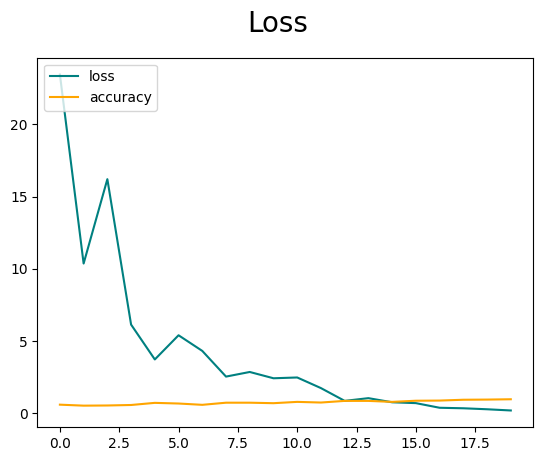

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])


results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

print(results)

3/3 [==============================] - 3s 928ms/step - loss: 0.0308 - accuracy: 1.0000
    Train Accuracy  Train Loss  Epochs
0         0.954545    0.168168       1
1         0.954545    0.151998       2
2         0.965909    0.125084       3
3         0.954545    0.132537       4
4         0.965909    0.089241       5
5         0.943182    0.107600       6
6         0.943182    0.122866       7
7         0.965909    0.108239       8
8         0.965909    0.082753       9
9         0.977273    0.052523      10
10        1.000000    0.043724      11
11        0.988636    0.049998      12
12        1.000000    0.037431      13
13        1.000000    0.034548      14
14        0.988636    0.035934      15
15        1.000000    0.036325      16
16        0.988636    0.034604      17
17        1.000000    0.033109      18
18        1.000000    0.026795      19
19        1.000000    0.030802      20


# 10. Test

In [33]:
from PIL import Image

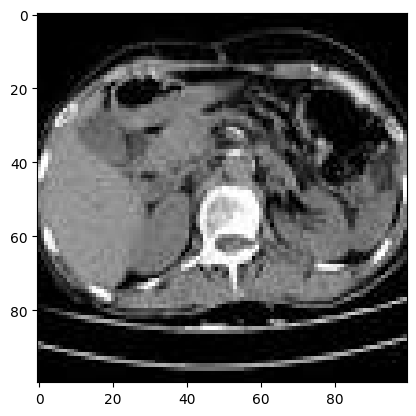

In [43]:
img = Image.open('/work/Cancer2/GS/GS04.jpeg')
plt.imshow(img)
plt.show()

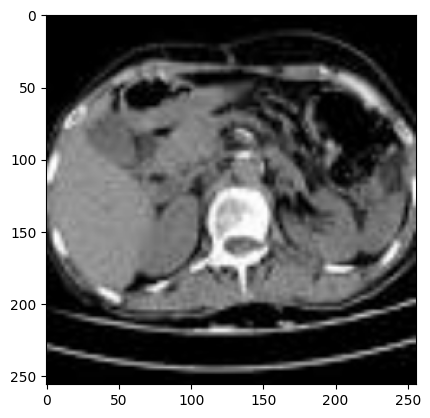

In [44]:
# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))

1/1 [==============================] - 0s 63ms/step


In [46]:
predicted_class = np.argmax(yhat)

test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.00024129581
Test Loss: 8.329487


In [38]:
if yhat < 0.5: 
    print(f'Predicted class is Gallstones')
else:
    print(f'Predicted class is PancreaticCancer')

Predicted class is Gallstones


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>